## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
df_customers = pd.read_csv('../artifacts/raw_data/olist_customers_raw.csv')
df_geolocation = pd.read_csv('../artifacts/raw_data/olist_geolocation_raw.csv')
df_items = pd.read_csv('../artifacts/raw_data/olist_order_items_raw.csv')
df_payments = pd.read_csv('../artifacts/raw_data/olist_order_payments_raw.csv')
df_reviews = pd.read_csv('../artifacts/raw_data/olist_order_reviews_raw.csv')
df_orders = pd.read_csv('../artifacts/raw_data/olist_orders_raw.csv')
df_products = pd.read_csv('../artifacts/raw_data/olist_products_raw.csv')
df_sellers = pd.read_csv('../artifacts/raw_data/olist_sellers_raw.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
orders_items = pd.merge(df_orders, df_items, on='order_id', how='inner')
orders_items_payments = pd.merge(orders_items, df_payments, on='order_id', how='left')
merged = pd.merge(orders_items_payments, df_reviews, on='order_id', how='left')
merged = pd.merge(merged, df_customers, on='customer_id', how='left')
merged = pd.merge(merged, df_sellers, on='seller_id', how='left')
df = pd.merge(merged, df_products, on='product_id', how='left')

In [4]:
df_geolocation.shape

(1000163, 5)

In [5]:
df.shape

(118310, 39)

In [6]:
df_geolocation.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [7]:
df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


## Duplicates/nulls/negative values check

In [8]:
df_geolocation.duplicated(keep='first').sum()

261831

In [9]:
df.duplicated(keep='first').sum()

0

##### NOTE: *It is typicall and expected that geolocation has duplicated values.*

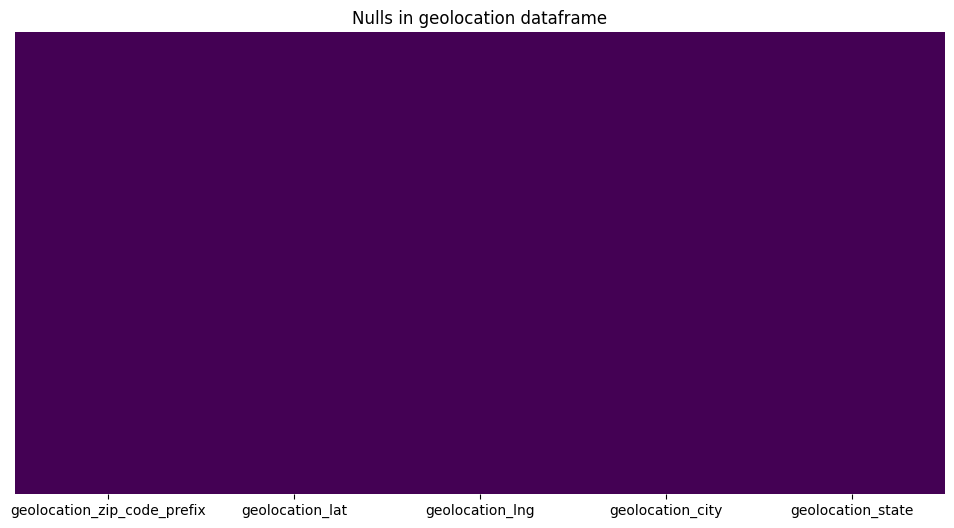

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_geolocation.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Nulls in geolocation dataframe')
plt.savefig('../artifacts/images/isnull_geolocation.png', dpi=300, bbox_inches='tight')
plt.show()

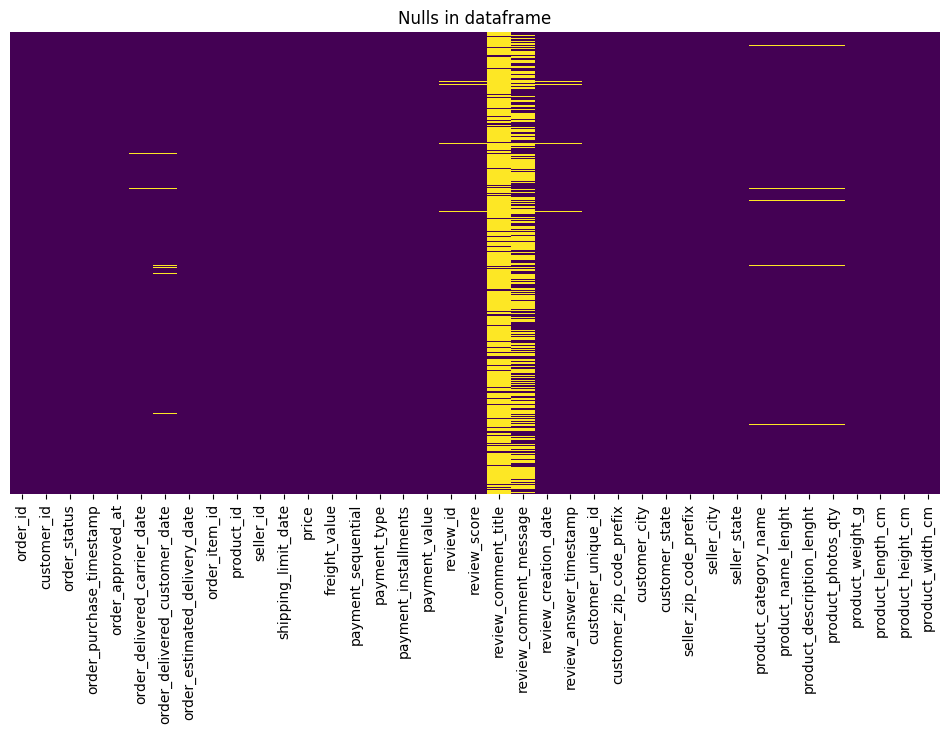

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Nulls in dataframe')
plt.savefig('../artifacts/images/isnull.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *It is typicall and expected that reviews are mostly empty. Rest empty values I will probably just delete.*

In [12]:
df_geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [13]:
columns = [0, 1, 2]
negatives = (df_geolocation.iloc[:,columns]< 0).any()
negatives

geolocation_zip_code_prefix    False
geolocation_lat                 True
geolocation_lng                 True
dtype: bool

In [14]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_unique_

In [15]:
columns = [8, 12, 13, 14, 16, 17, 19, 25, 28, 32, 33, 34, 35, 36, 37, 38]
negatives = (df.iloc[:,columns]< 0).any()
negatives

order_item_id                 False
price                         False
freight_value                 False
payment_sequential            False
payment_installments          False
payment_value                 False
review_score                  False
customer_zip_code_prefix      False
seller_zip_code_prefix        False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g              False
product_length_cm             False
product_height_cm             False
product_width_cm              False
dtype: bool

##### NOTE: *There aren't any negative values in main df. Geolocation has negative values because it has negative coordinates.*

## Converting columns to datetime

In [16]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_unique_

In [17]:
columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [18]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                    

## Agumentation with new columns

In [19]:
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()
df['hour_of_day'] = df['order_purchase_timestamp'].dt.hour
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
df['order_date'] = df['order_purchase_timestamp'].dt.date
df['review_answer_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

## EDA - Exploratory Data Analysis

In [20]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118310 non-null  object        
 1   customer_id                    118310 non-null  object        
 2   order_status                   118310 non-null  object        
 3   order_purchase_timestamp       118310 non-null  datetime64[ns]
 4   order_approved_at              118295 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117056 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118310 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  int64         
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [22]:
df_geolocation.describe().map(lambda x: f'{x:0.2f}')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1000163.00,1000163.00,1000163.00
mean,36574.17,-21.18,-46.39
std,30549.34,5.72,4.27
min,1001.00,-36.61,-101.47
25%,11075.00,-23.60,-48.57
50%,26530.00,-22.92,-46.64
75%,63504.00,-19.98,-43.77
max,99990.00,45.07,121.11


In [23]:
df.describe().select_dtypes(include=['float64', 'int64', 'int32']).map(lambda x: f'{x:0.2f}')

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,hour_of_day,review_answer_time_days
count,118310.00,118310.00,118310.00,118307.00,118307.00,118307.00,117332.00,118310.00,118310.00,116601.00,116601.00,116601.00,118290.00,118290.00,118290.00,118290.00,118310.00,115722.00
mean,1.20,120.65,20.03,1.09,2.94,172.58,4.03,35050.66,24442.41,48.77,785.97,2.21,2112.25,30.27,16.62,23.07,14.76,12.02
min,1.00,0.85,0.00,1.00,0.00,0.00,1.00,1003.00,1001.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00,0.00,0.00
25%,1.00,39.90,13.08,1.00,1.00,60.85,4.00,11310.00,6429.00,42.00,346.00,1.00,300.00,18.00,8.00,15.00,11.00,6.00
50%,1.00,74.90,16.28,1.00,2.00,108.20,5.00,24275.50,13660.00,52.00,600.00,1.00,700.00,25.00,13.00,20.00,15.00,10.00
75%,1.00,134.90,21.18,1.00,4.00,189.26,5.00,58636.25,27972.00,57.00,983.00,3.00,1800.00,38.00,20.00,30.00,19.00,15.00
max,21.00,6735.00,409.68,29.00,24.00,13664.08,5.00,99990.00,99730.00,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,23.00,209.00
std,0.70,184.11,15.84,0.73,2.78,267.11,1.39,29824.59,27573.00,10.03,652.58,1.72,3786.70,16.19,13.45,11.75,5.33,9.45


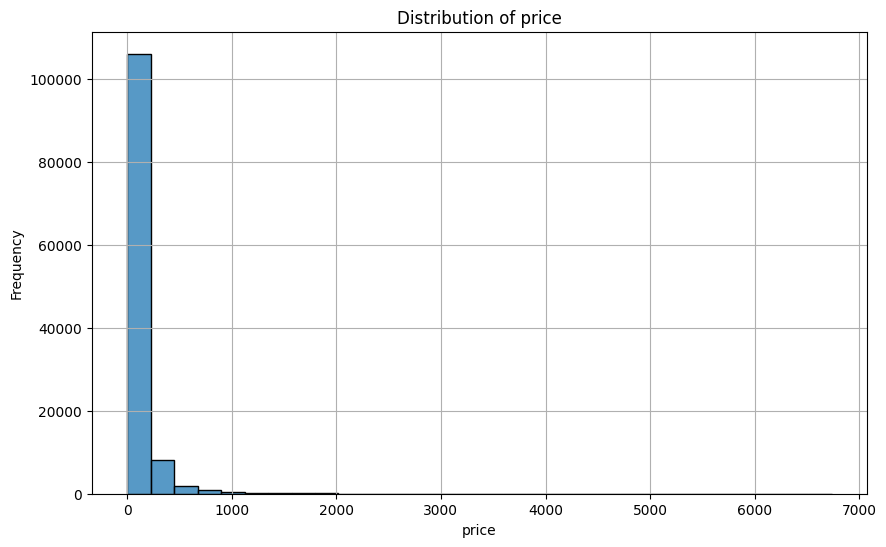

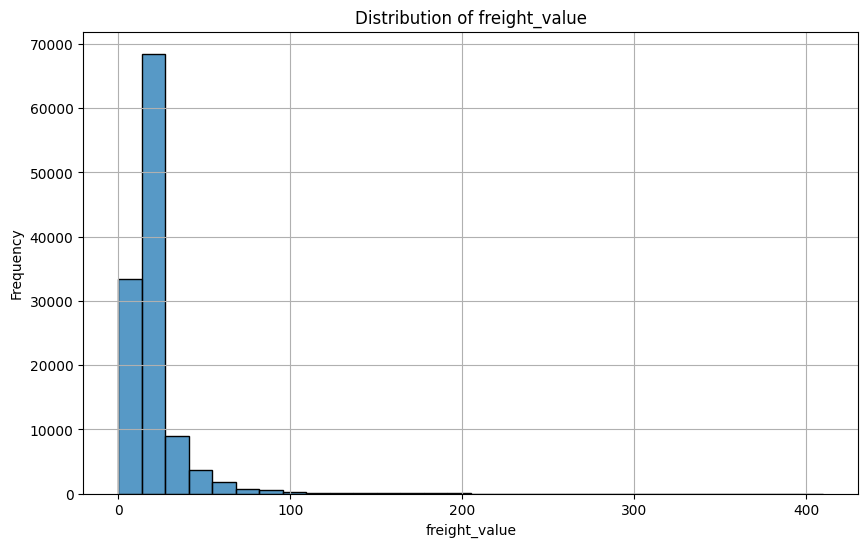

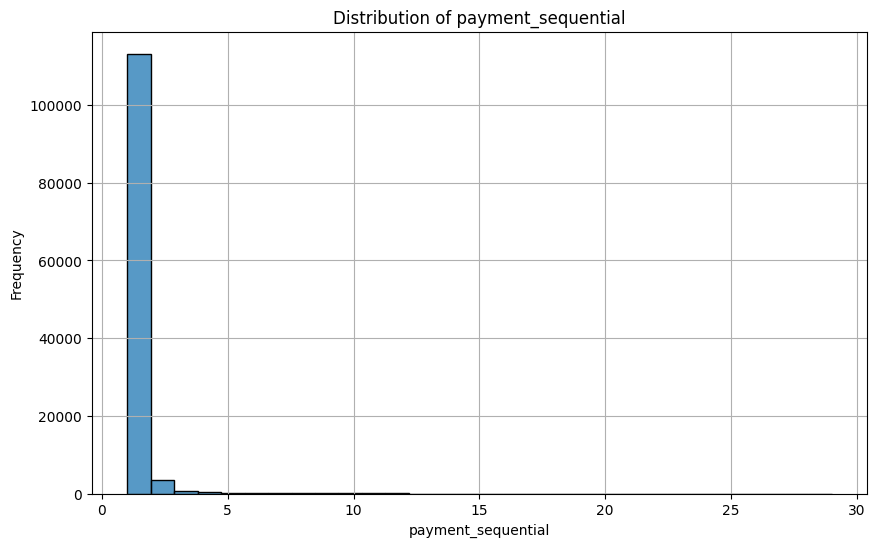

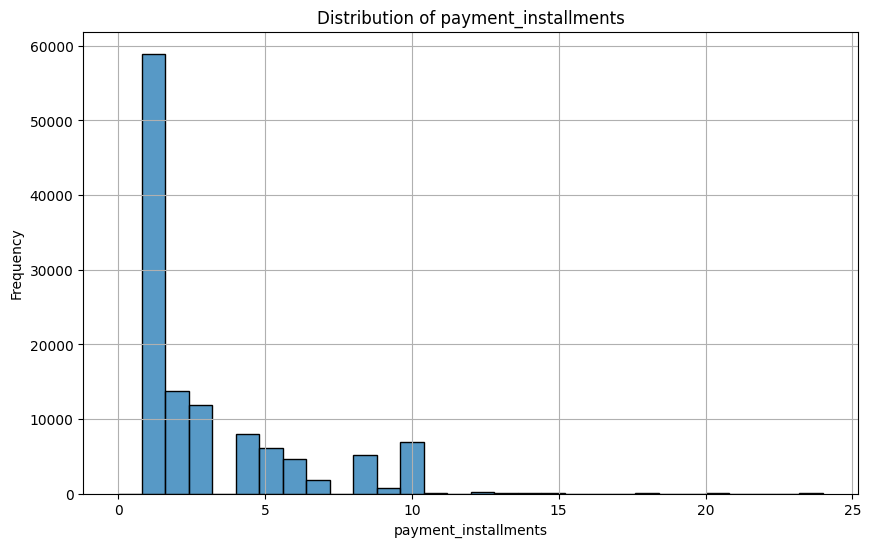

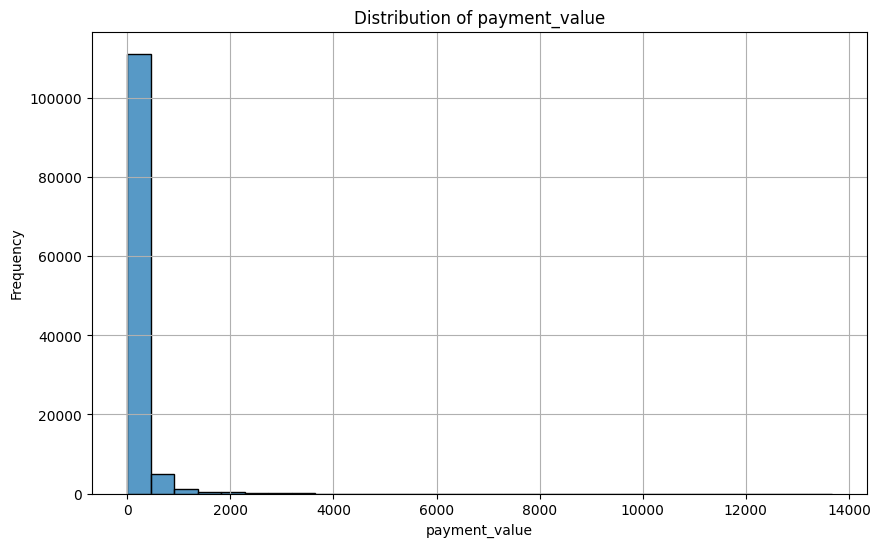

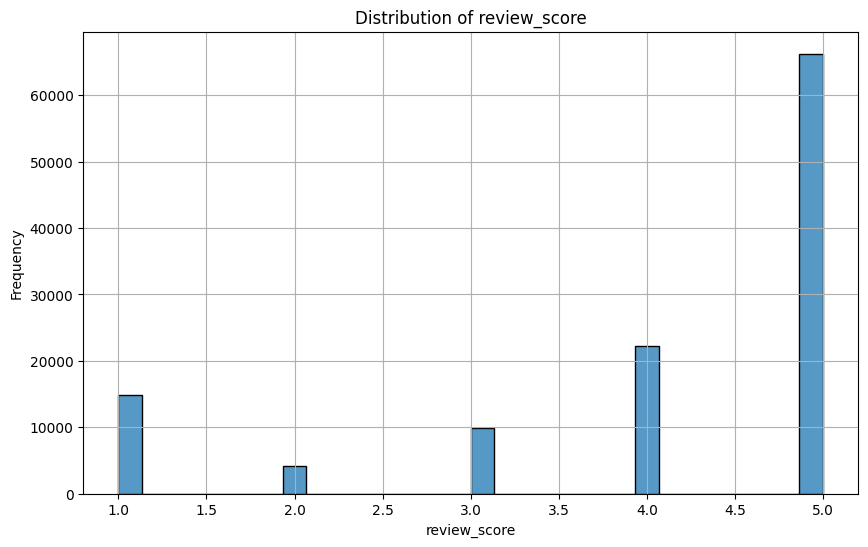

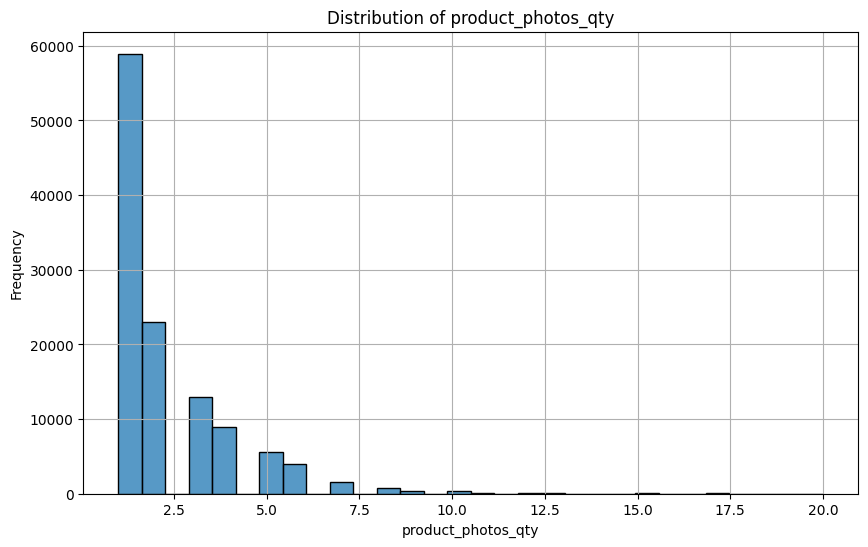

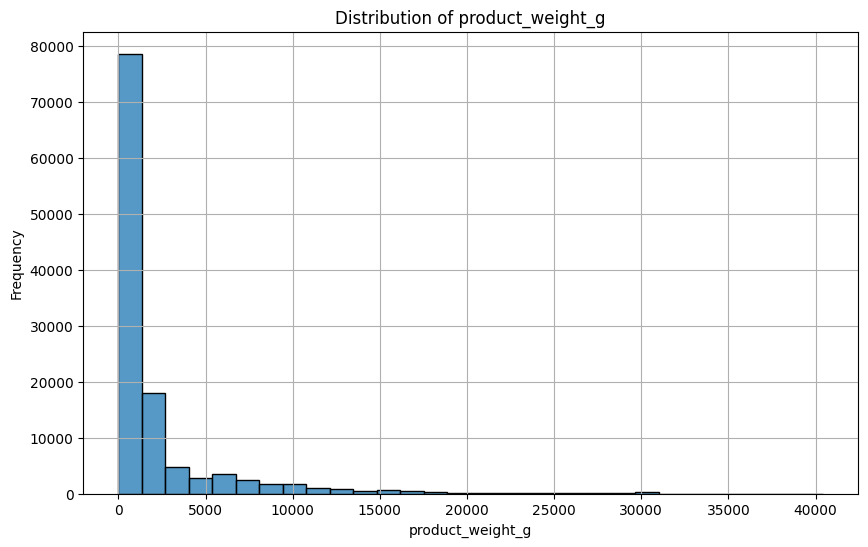

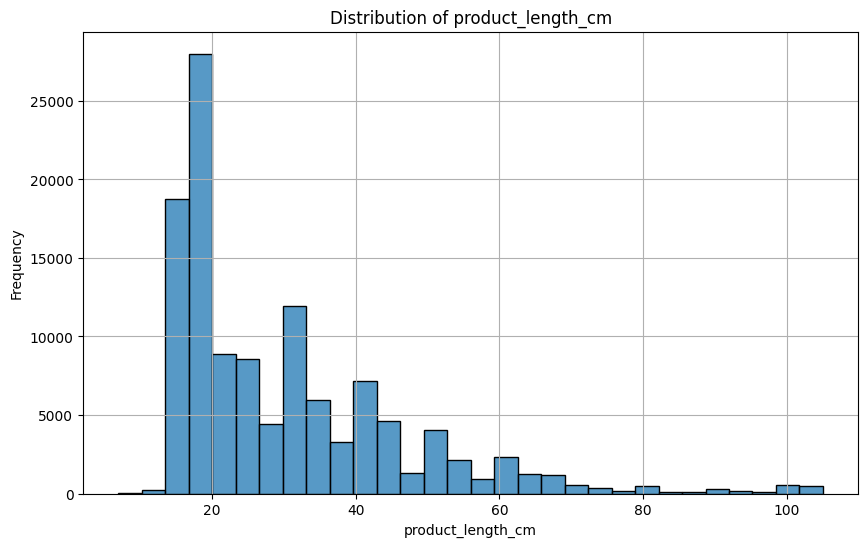

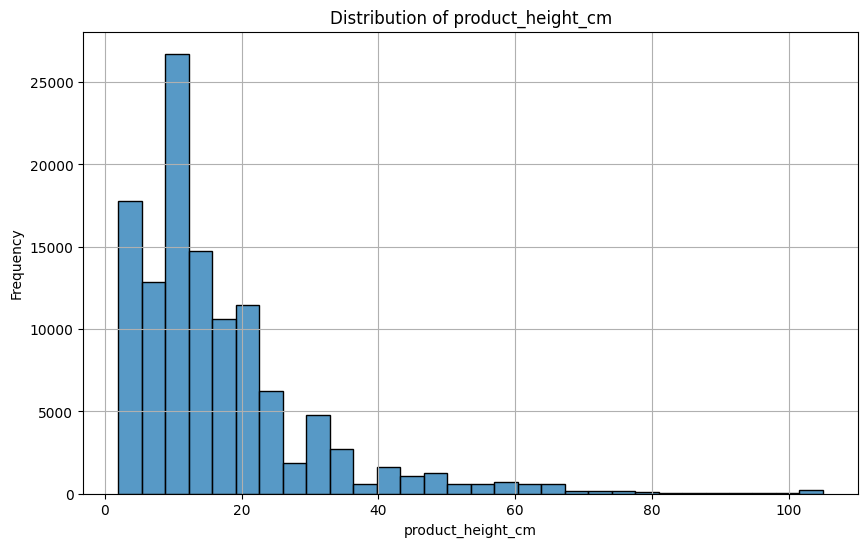

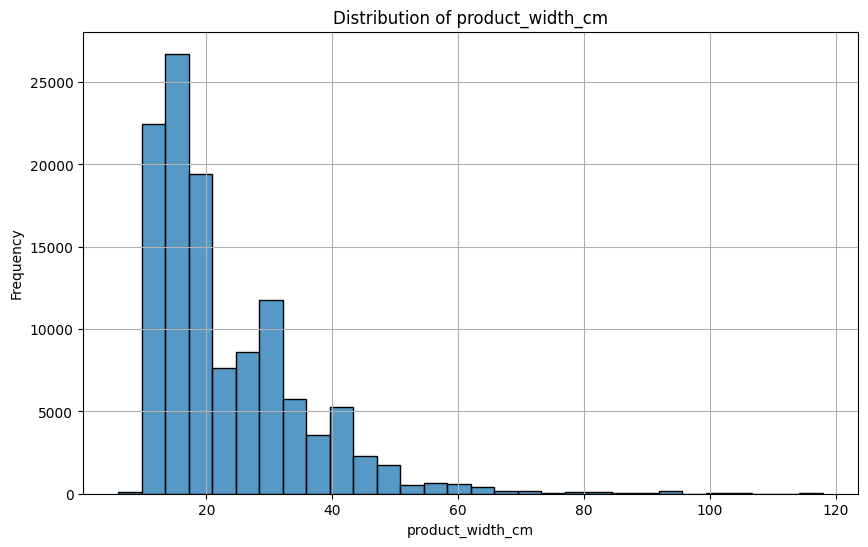

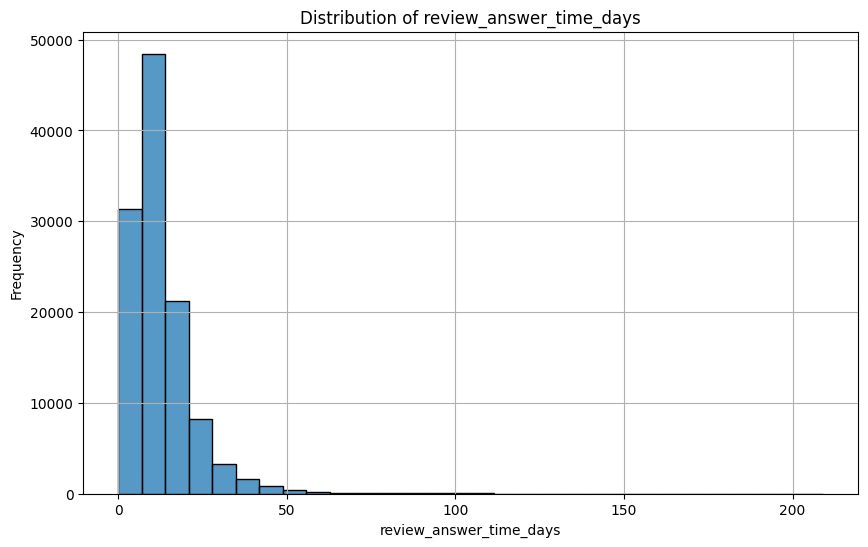

In [24]:
cols = ['price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value',
        'review_score', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
        'product_height_cm', 'product_width_cm', 'review_answer_time_days']

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.savefig(f'../artifacts/images/{col}_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()

##### NOTE: *Histograms are typicall for E-Commerce with high frequency in lower X values. Distribution of review_score looks more interesting because of lower values for 2 and 3 rating. But this was to be expected. People are more inclined to give extreme ratings.*

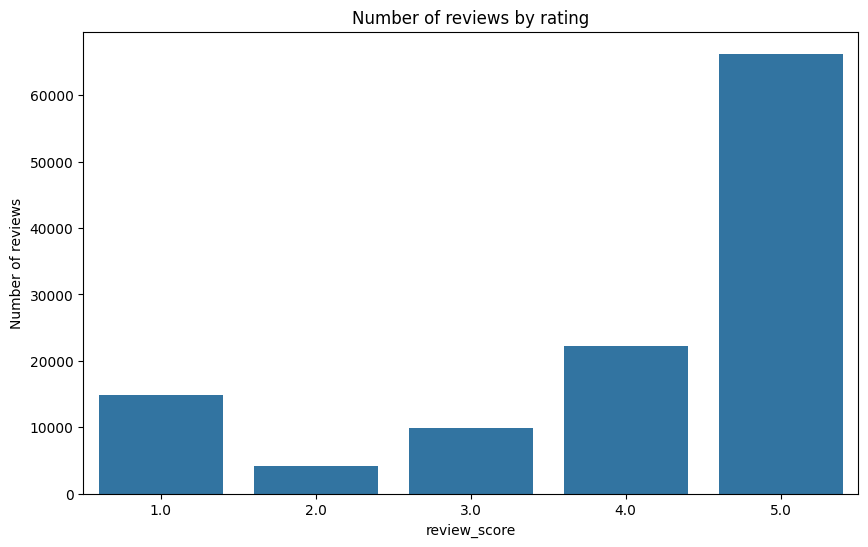

In [25]:
sum_reviews = df.groupby('review_score')['review_score'].count()
plt.figure(figsize=(10,6))
sns.barplot(x=sum_reviews.index, y=sum_reviews.values)
plt.title("Number of reviews by rating")
plt.ylabel("Number of reviews")
plt.savefig(f'../artifacts/images/number_of_reviews_rating_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

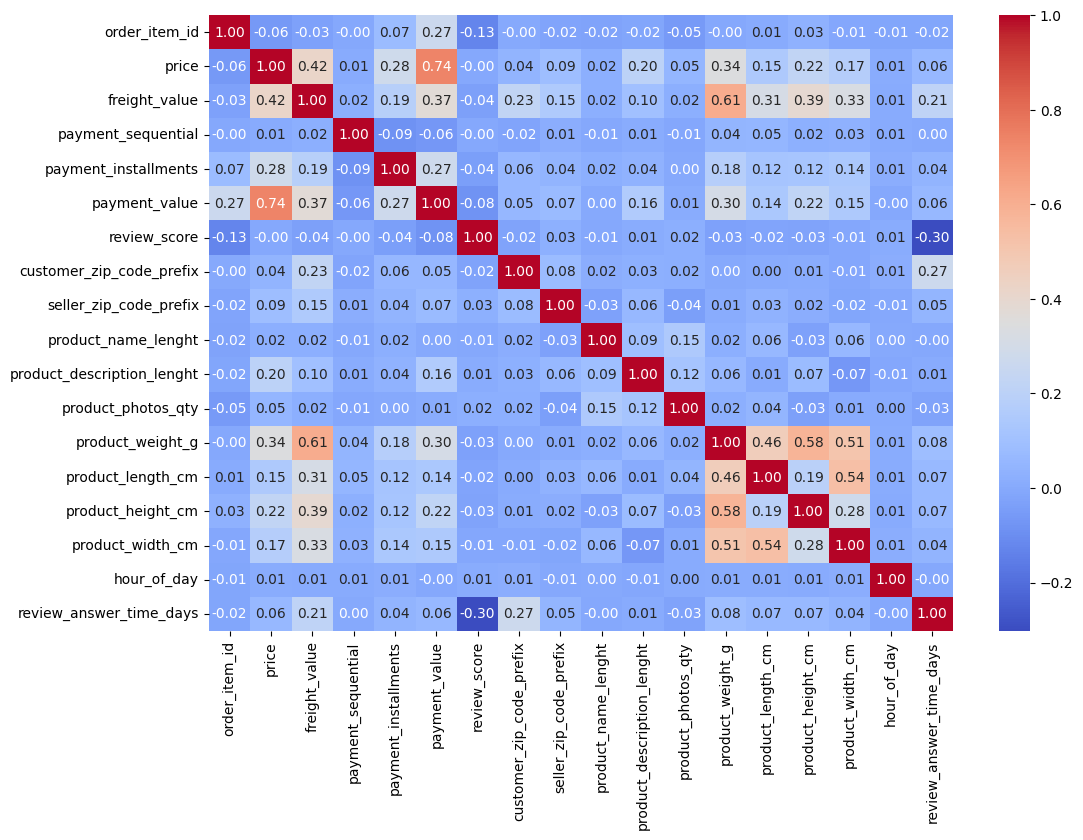

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.savefig('../artifacts/images/corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
print(df['customer_city'].unique())
print(df['customer_state'].unique())

['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']


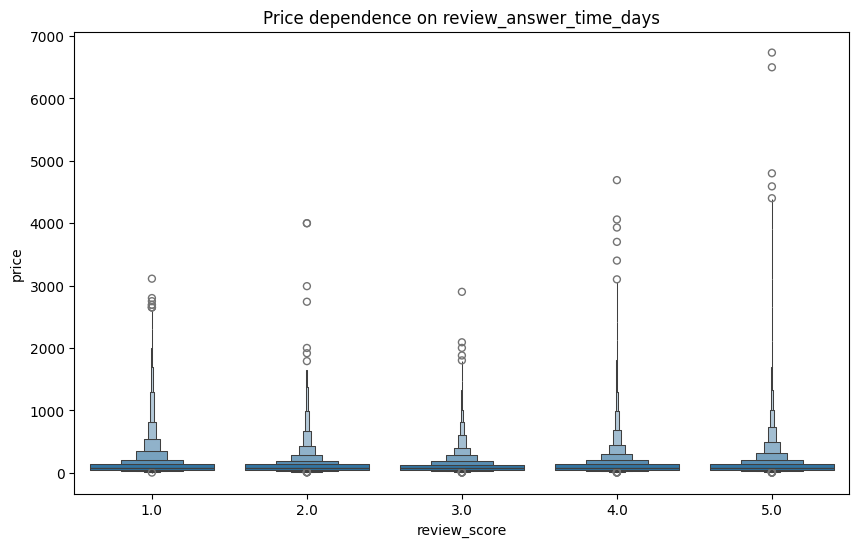

In [28]:
plt.figure(figsize=(10,6))
sns.boxenplot(x=df['review_score'], y=df['price'])
plt.title(f"Price dependence on {col}")
plt.savefig(f'../artifacts/images/review_score_box.png', dpi=300, bbox_inches='tight')
plt.show()

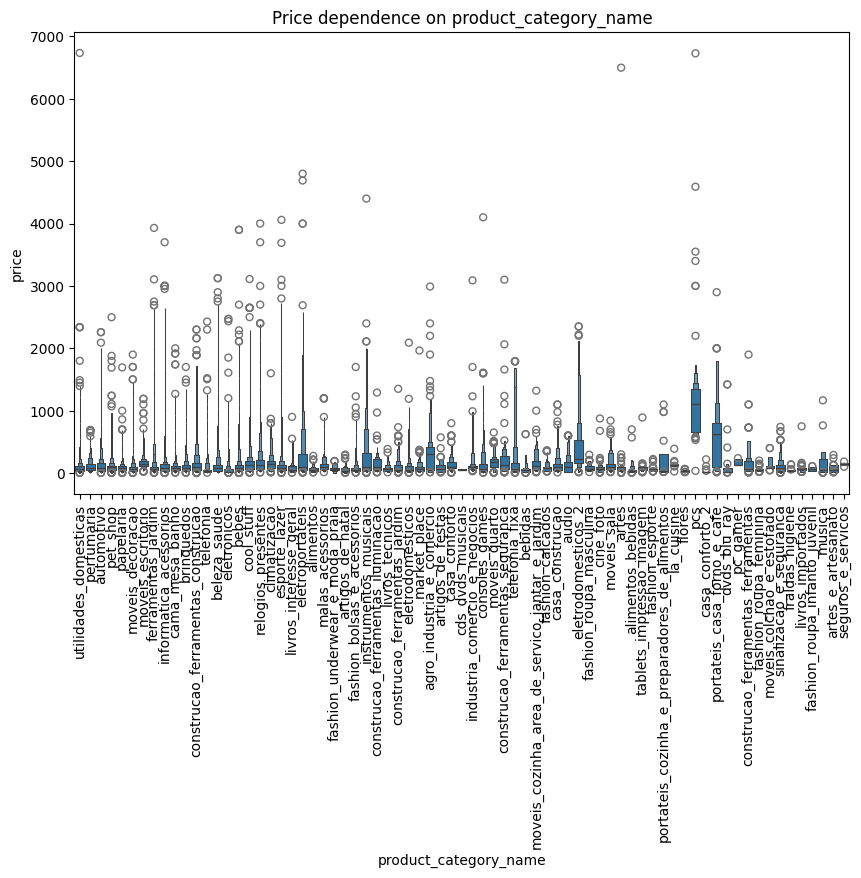

In [29]:
plt.figure(figsize=(10,6))
sns.boxenplot(x=df['product_category_name'], y=df['price'])
plt.xticks(rotation=90)
plt.title(f"Price dependence on product_category_name")
plt.savefig(f'../artifacts/images/product_category_name_box.png', dpi=300, bbox_inches='tight')
plt.show()

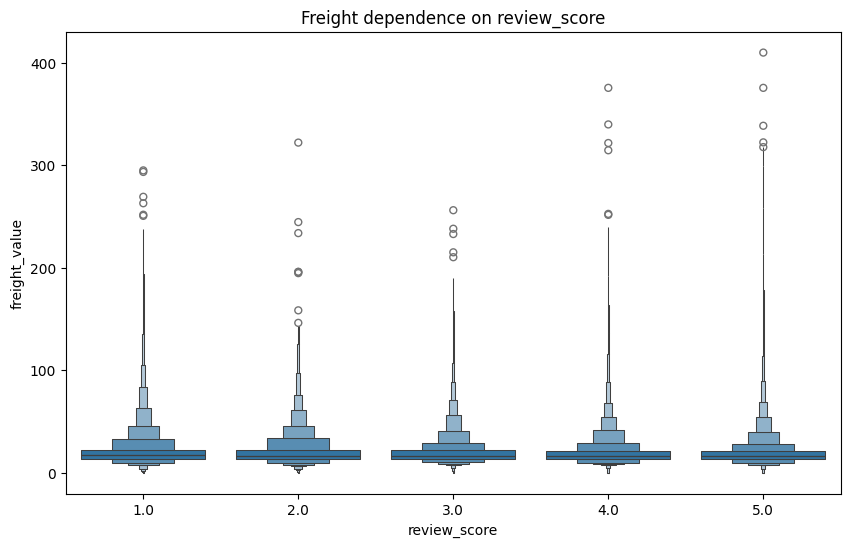

In [30]:
cols = ['review_score']
for col in cols:
    plt.figure(figsize=(10,6))
    sns.boxenplot(x=df[col], y=df['freight_value'])
    plt.title(f"Freight dependence on {col}")
    plt.savefig(f'../artifacts/images/{col}_freight_box.png', dpi=300, bbox_inches='tight')
    plt.show()

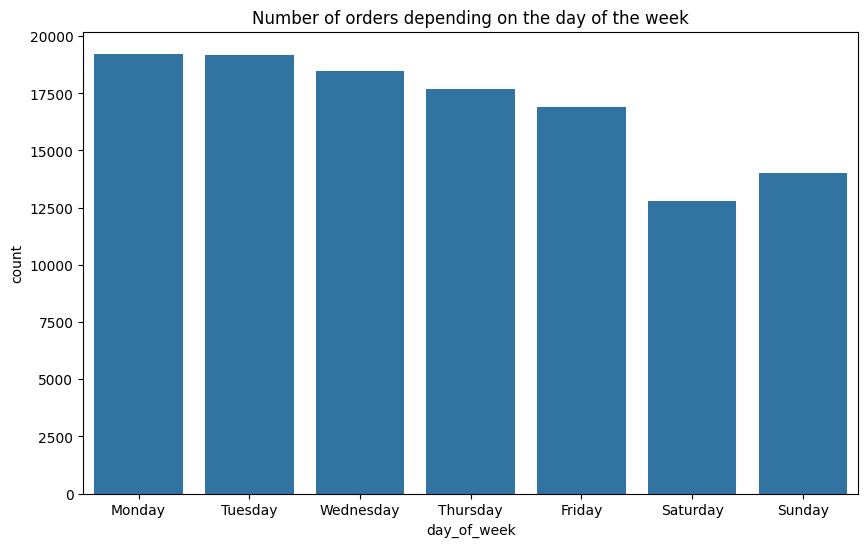

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_week', order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
plt.title("Number of orders depending on the day of the week")
plt.savefig(f'../artifacts/images/day_of_weak_countplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *The first few days of the week are clearly characterized by greater sales activity, with a noticeable decline until Saturday. A certain revival is visible on Sundays.*

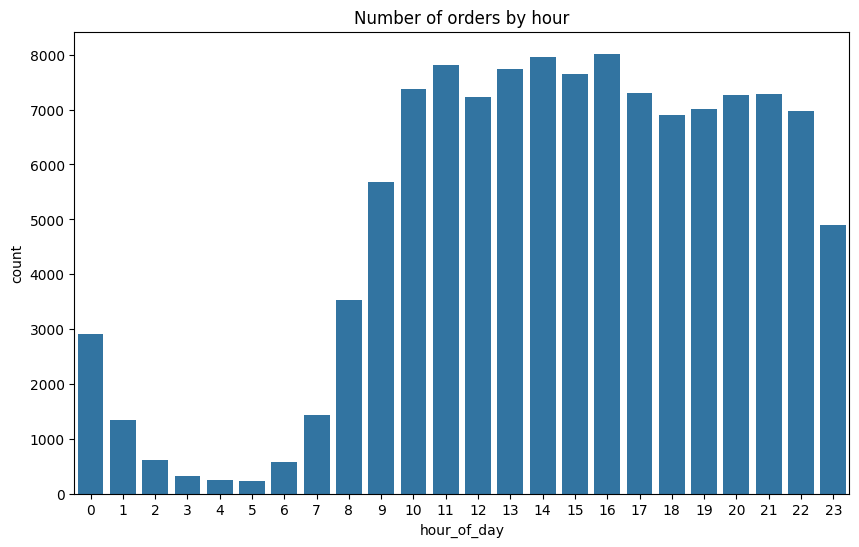

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour_of_day')
plt.title("Number of orders by hour")
plt.savefig(f'../artifacts/images/gout_of_day_countplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *It seems that most people shop during daytime work hours after completing their morning duties, with a slight drop-off towards the evening.*

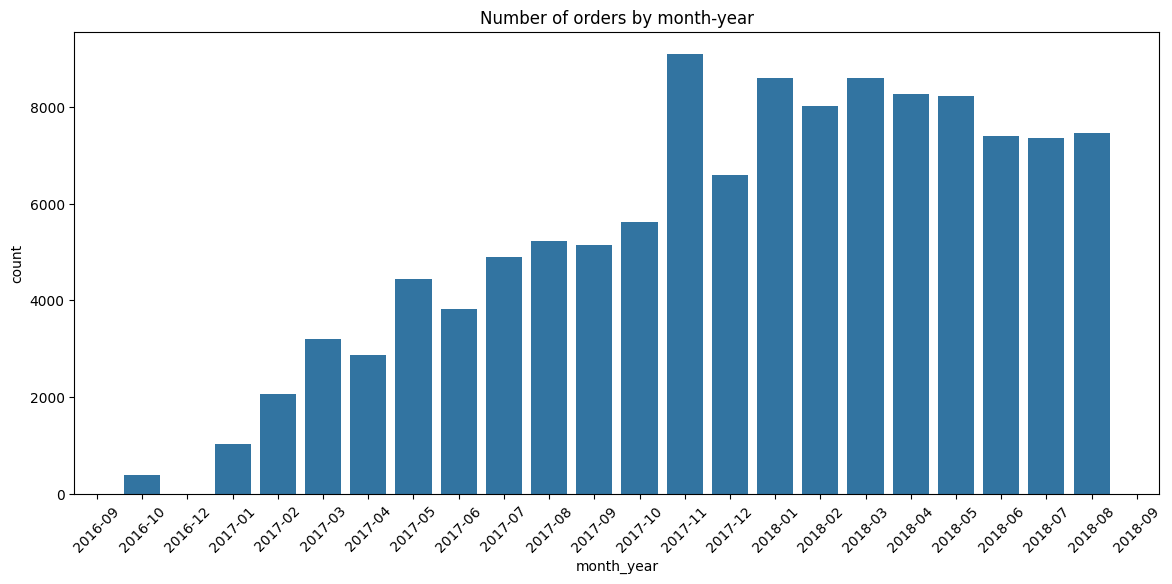

In [33]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='month_year', order=sorted(df['month_year'].unique()))
plt.xticks(rotation=45)
plt.title("Number of orders by month-year")
plt.savefig(f'../artifacts/images/month_year_countplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *The steady increase in sales may be related to the increasing popularity of the sales platform, especially since the first months of 2017 and 2018 differ significantly. A clear sales peak occurred in November, most likely due to numerous promotions for the upcoming holidays.*

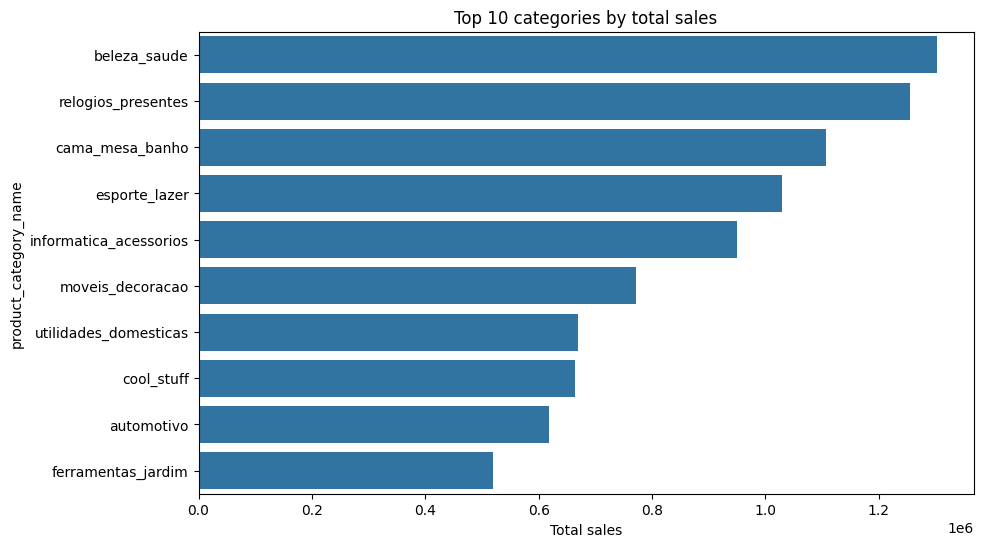

In [34]:
top_categories = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 categories by total sales")
plt.xlabel("Total sales")
plt.savefig(f'../artifacts/images/top_categories_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

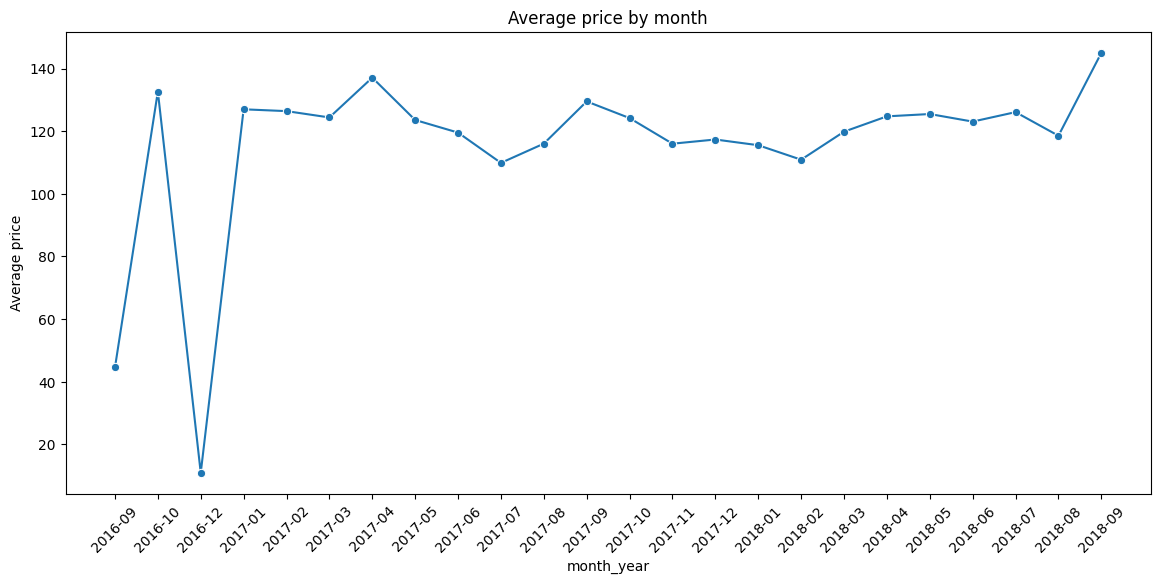

In [35]:
avg_price_month = df.groupby('month_year')['price'].mean()
plt.figure(figsize=(14,6))
sns.lineplot(x=avg_price_month.index, y=avg_price_month.values, marker='o')
plt.xticks(rotation=45)
plt.title("Average price by month")
plt.ylabel("Average price")
plt.savefig(f'../artifacts/images/avg_price_month_lineplot.png', dpi=300, bbox_inches='tight')
plt.show()

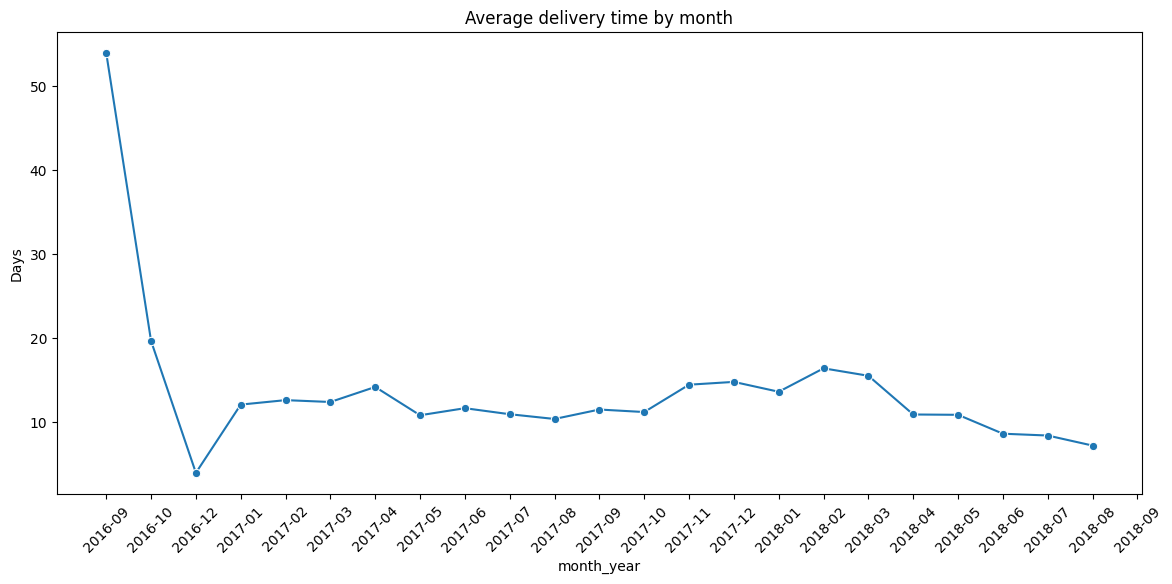

In [36]:
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
avg_delivery = df.groupby('month_year')['delivery_time_days'].mean()
plt.figure(figsize=(14,6))
sns.lineplot(x=avg_delivery.index, y=avg_delivery.values, marker='o')
plt.xticks(rotation=45)
plt.title("Average delivery time by month")
plt.ylabel("Days")
plt.savefig(f'../artifacts/images/avg_delivery_time_month_lineplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *For both the average monthly price and the average delivery time, the sudden changes in the chart are due to the limited amount of data for 2016.*

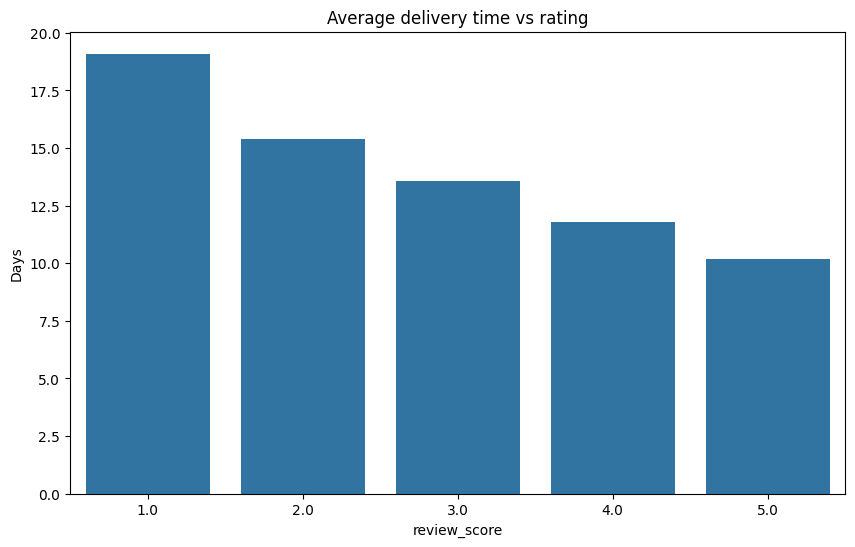

In [37]:
avg_delivery_review = df.groupby('review_score')['delivery_time_days'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_delivery_review.index, y=avg_delivery_review.values)
plt.title("Average delivery time vs rating")
plt.ylabel("Days")
plt.savefig(f'../artifacts/images/avg_delivery_vs_rating_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *When buyers have to wait longer for delivery or there are delays, the seller receives more negative ratings.*

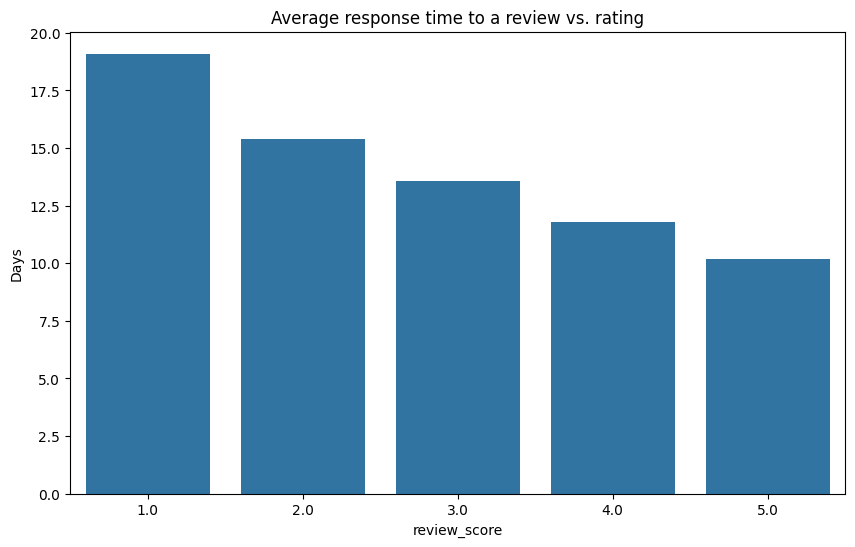

In [38]:
avg_answer_time = df.groupby('review_score')['review_answer_time_days'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_answer_time.index, y=avg_answer_time.values)
plt.title("Average response time to a review vs. rating")
plt.ylabel("Days")
plt.savefig(f'../artifacts/images/avf_response_time_review_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *The average time to give a rating is longer for lower ratings, which may be due to a longer wait for delivery.*

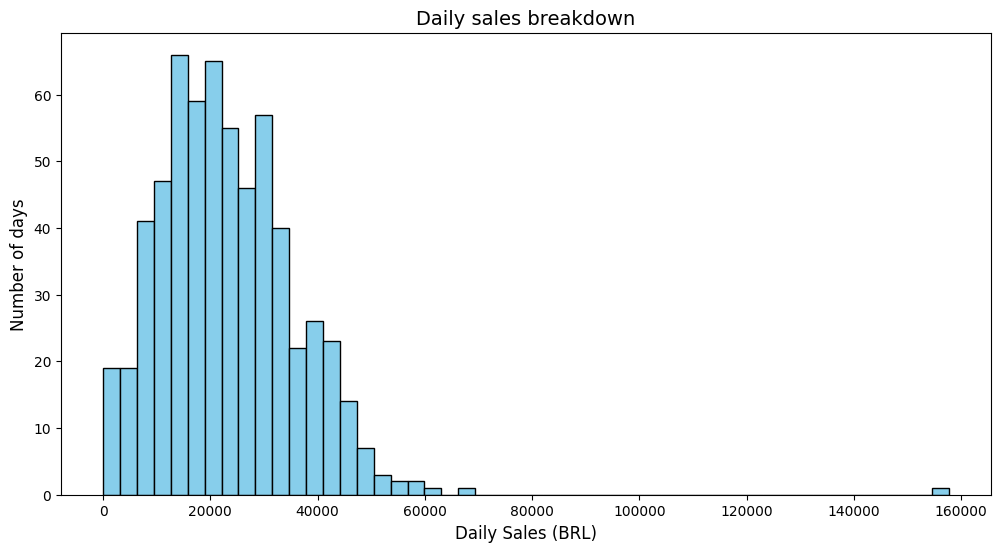

In [39]:
daily_sales = df.groupby('order_date')['price'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.hist(daily_sales['price'], bins=50, color='skyblue', edgecolor='black')
plt.title("Daily sales breakdown", fontsize=14)
plt.xlabel("Daily Sales (BRL)", fontsize=12)
plt.ylabel("Number of days", fontsize=12)
plt.savefig(f'../artifacts/images/daily_sales_hist.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *Asymmetric right-skewed distribution — many observations in lower values ​​and a tail towards higher sales. I will check logarithmic transformation.*

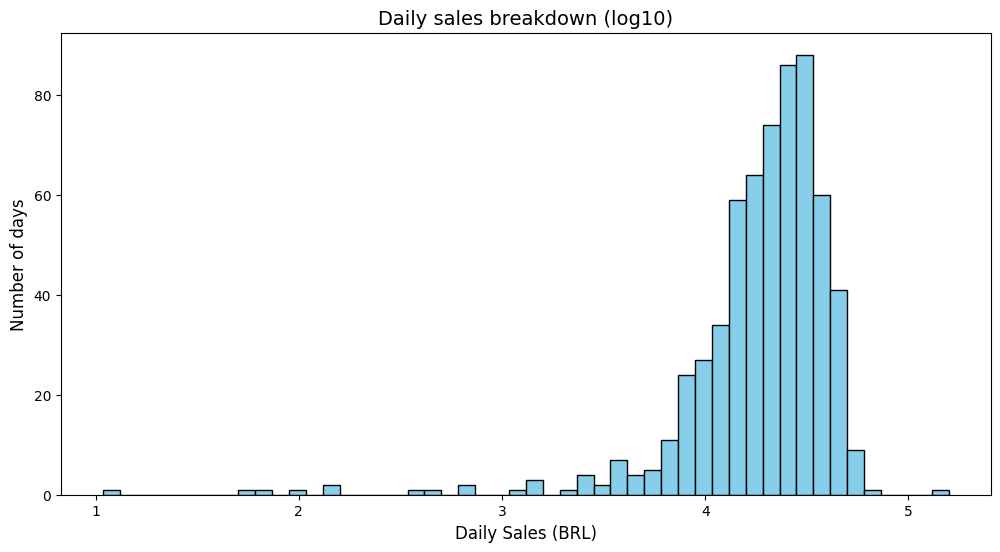

In [40]:
plt.figure(figsize=(12,6))
plt.hist(np.log10(daily_sales['price']), bins=50, color='skyblue', edgecolor='black')
plt.title("Daily sales breakdown (log10)", fontsize=14)
plt.xlabel("Daily Sales (BRL)", fontsize=12)
plt.ylabel("Number of days", fontsize=12)
plt.savefig(f'../artifacts/images/log10_daily_sales_hist.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *I will stay with distribution without logarithmic transformation and check distribution with cut off outliers.*

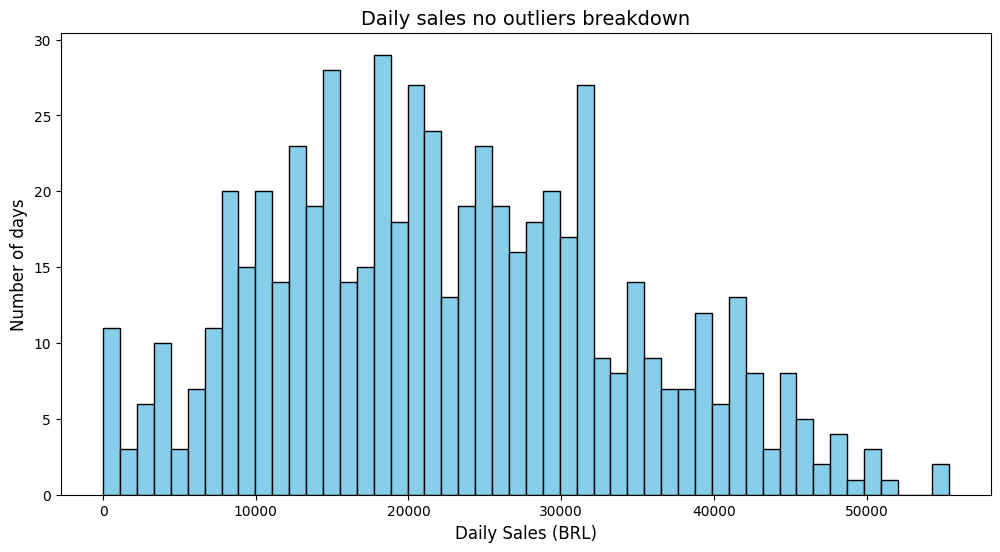

In [41]:
Q1 = daily_sales['price'].quantile(0.25)
Q3 = daily_sales['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
daily_sales_no_outliers = daily_sales[daily_sales['price'] <= upper_bound]

plt.figure(figsize=(12,6))
plt.hist(daily_sales_no_outliers['price'], bins=50, color='skyblue', edgecolor='black')
plt.title("Daily sales no outliers breakdown", fontsize=14)
plt.xlabel("Daily Sales (BRL)", fontsize=12)
plt.ylabel("Number of days", fontsize=12)
plt.savefig(f'../artifacts/images/daily_sales_no_outliers_hist.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *For future forecasting I will use LSTM neural networks, which can handle temporal dependencies in the sales data. Although the daily sales distribution is skewed, this is not critical for sequence models like LSTM. The preprocessing will focus on scaling and sequence preparation rather than distribution normalization.*